In [1]:
import xarray as xr
import os
import sys
sys.path.append('/glade/u/home/jzweifel/utils')
from load_variable import load_variable_for_all_years

SFSO2 = load_variable_for_all_years('h0', 'SFSO2')
# units : kg/m2/s
# long_name : SO2 surface flux

BURDENSO4 = load_variable_for_all_years('h3', 'BURDENSO4')
# units : kg/m2
# long_name : Sulfate aerosol burden, day only

In [47]:
NPO_mask = xr.open_dataarray('NPO_binary_map_lower_bound_20_deg.nc').where(NPO_mask>0)
grid_cell_areas = xr.open_dataarray('grid_cell_areas.nc')

area_weighting = (NPO_mask*grid_cell_areas)/(NPO_mask*grid_cell_areas).mean(dim=['lat', 'lon'])

In [58]:
monthly_burden_1850 = (BURDENSO4['1850']*area_weighting).groupby('time.month').mean(dim=['time', 'lat', 'lon']).roll(month=-1)
monthly_burden_1970 = (BURDENSO4['1970']*area_weighting).groupby('time.month').mean(dim=['time', 'lat', 'lon']).roll(month=-1)
monthly_burden_2000 = (BURDENSO4['2000']*area_weighting).groupby('time.month').mean(dim=['time', 'lat', 'lon']).roll(month=-1)
monthly_burden_2006 = (BURDENSO4['2006']*area_weighting).groupby('time.month').mean(dim=['time', 'lat', 'lon']).roll(month=-1)

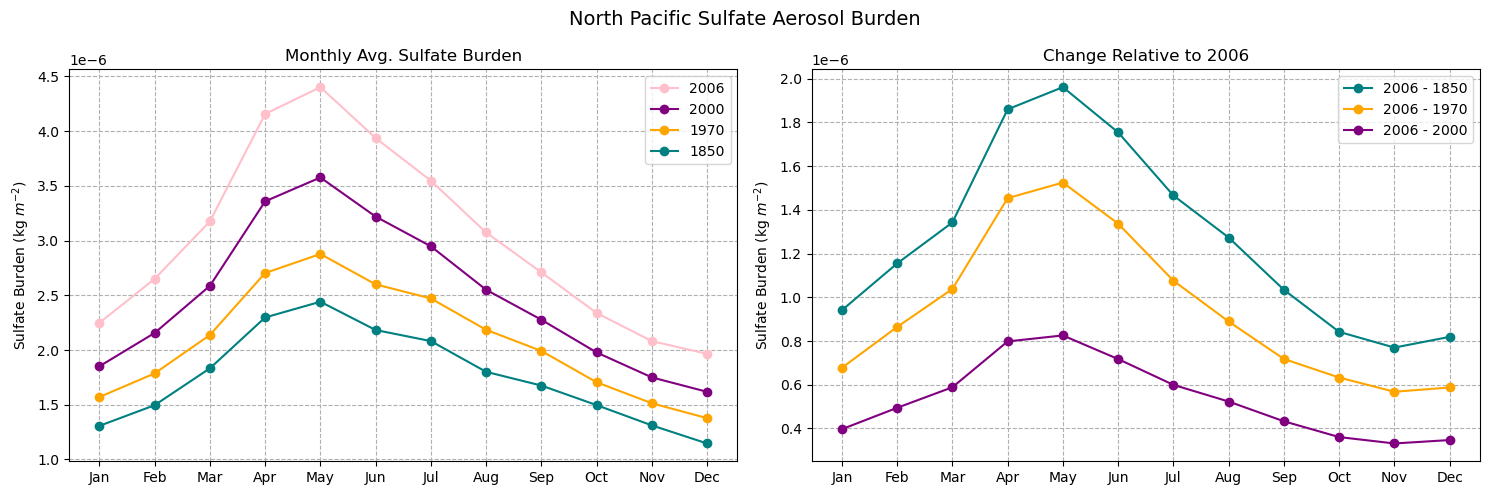

In [88]:
from matplotlib import pyplot as plt
import calendar

months = [calendar.month_abbr[i] for i in range(1,13)]

fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].plot(months, monthly_burden_2006, label='2006', marker = 'o', color='pink')
axs[0].plot(months, monthly_burden_2000, label='2000', marker = 'o', color='purple')
axs[0].plot(months, monthly_burden_1970, label='1970', marker = 'o', color='orange')
axs[0].plot(months, monthly_burden_1850, label='1850', marker = 'o', color='teal')
axs[0].grid(linestyle='--')
axs[0].set_ylabel(r'Sulfate Burden (kg $m^{-2}$)')
axs[0].set_title('Monthly Avg. Sulfate Burden')
axs[0].legend()

axs[1].plot(months, monthly_burden_2006-monthly_burden_1850, label='2006 - 1850', marker = 'o', color = 'teal')
axs[1].plot(months, monthly_burden_2006-monthly_burden_1970, label='2006 - 1970', marker = 'o', color='orange')
axs[1].plot(months, monthly_burden_2006-monthly_burden_2000, label='2006 - 2000', marker = 'o', color='purple')
axs[1].grid(linestyle='--')
axs[1].set_ylabel(r'Sulfate Burden (kg $m^{-2}$)')
axs[1].set_title('Change Relative to 2006')
axs[1].legend()
axs[1].legend()

fig.suptitle('North Pacific Sulfate Aerosol Burden', fontsize=14)
plt.tight_layout()
plt.show()